# What is the Modern Portfolio Theory (MPT)?

The Modern Portfolio Theory (MPT) refers to an investment theory that allows investors to assemble an asset portfolio that maximizes expected return for a given level of risk. The theory assumes that investors are risk-averse; for a given level of expected return, investors will always prefer the less risky portfolio.

Hence, according to the Modern Portfolio Theory, an investor must be compensated for a higher level of risk through higher expected returns. MPT employs the core idea of diversification – owning a portfolio of assets from different classes is less risky than holding a portfolio of similar assets.

## Portfolio Frontier

According to the Modern Portfolio Theory, a portfolio frontier, also known as an efficient frontier, is a set of portfolios that maximizes expected returns for each level of standard deviation (risk). A typical portfolio frontier is illustrated below:

![Efficient frontier](https://cdn.corporatefinanceinstitute.com/assets/modern-portfolio-theory1.jpeg.png)

The upper portion of the curve (point A onwards) is the “efficient frontier” – it is the combination of risky-assets that maximizes expected return for a given level of standard deviation. Therefore, any portfolio on this portion of the curve offers the best possible expected returns for a given level of risk.

- Point “A” on the efficient frontier is the minimum variance portfolio – the combination of risky-assets that minimizes standard deviation/risk.
- Point “B” is the optimal market portfolio, which consists of at least one risk-free asset. It is depicted by the line that is tangent to the efficient frontier, which is also called the Capital Allocation Line (CAL).

### Capital Allocation Line (CAL)
The Capital Allocation Line (CAL) is a line that depicts the risk-reward tradeoff of assets that carry idiosyncratic risk. The slope of the CAL is called the Sharpe ratio, which is the increase in expected return per additional unit of standard deviation (reward-to-risk ratio).

In the chart above, at point “B,” the reward-to-risk ratio (the slope of the CAL) is the highest, and it is the combination that creates the optimal portfolio according to the MPT.

## Risk-Free Rate

The risk-free rate refers to the rate of return an investor expects to earn on an asset with zero risk. All assets carry some degree of risk; therefore, assets that generally have low default risks and fixed returns are considered risk-free. An example of a risk-free asset is a 3-month government Treasury bill.

https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/modern-portfolio-theory-mpt/

In [1]:
import yfinance as yt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from tqdm.notebook import tqdm

from pypfopt import EfficientFrontier, plotting, black_litterman
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

from finvizfinance.quote import finvizfinance
from finvizfinance.screener.overview import Overview

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Import stocks from S&P 500 index to choose portfolio from them

In [3]:
# https://finviz.com/screener.ashx
fv_screener = Overview()
fv_screener.set_filter(filters_dict={'Index':'S&P 500'})
stocks_df = fv_screener.screener_view()

In [4]:
stocks_df

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,A,Agilent Technologies Inc.,Healthcare,Diagnostics & Research,USA,4.374000e+10,35.55,149.25,0.0134,724366.0
1,AAL,American Airlines Group Inc,Industrials,Airlines,USA,9.660000e+09,13.56,14.75,0.0124,16687058.0
2,AAPL,Apple Inc,Technology,Consumer Electronics,USA,2.643200e+12,26.63,171.17,-0.0420,74946300.0
3,ABBV,Abbvie Inc,Healthcare,Drug Manufacturers - General,USA,3.126100e+11,65.05,176.97,0.0040,2695120.0
4,ABNB,Airbnb Inc,Consumer Cyclical,Travel Services,USA,1.077500e+11,23.34,168.86,0.0252,3872545.0
...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc,Industrials,Specialty Industrial Machinery,USA,3.154000e+10,47.96,130.46,0.0136,477462.0
499,YUM,Yum Brands Inc.,Consumer Cyclical,Restaurants,USA,3.848000e+10,24.45,136.78,0.0020,601828.0
500,ZBH,Zimmer Biomet Holdings Inc,Healthcare,Medical Devices,USA,2.608000e+10,26.02,127.17,0.0050,271780.0
501,ZBRA,Zebra Technologies Corp.,Technology,Communication Equipment,USA,1.513000e+10,51.49,294.54,0.0305,94804.0


In [5]:
stocks = stocks_df['Ticker'].to_list()

# 2. Randomly choose 30 stocks for portfolio

In [6]:
stocks = random.sample(stocks, 30)

# 3. Download historical data and prepare dataset

In [7]:
df = yt.download(stocks, period='5y', interval='1d')['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [8]:
sp500 = yt.download('^GSPC', period='5y', interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
# Delete stocks due to insufficient history, if any
df.dropna(axis=1, inplace=True)

In [10]:
df

,ACGL,AIZ,AOS,APD,AVGO,COF,CRM,CTLT,DOV,DPZ,...,SO,TMO,TRGP,TSCO,UAL,URI,WAB,WFC,XOM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-21,32.290001,87.075142,48.198673,166.930573,252.634155,75.647911,166.732193,43.119999,85.509850,232.354263,...,41.990543,267.858398,35.309216,87.446281,81.000000,117.111267,71.547165,43.159405,63.445271,121.123032
2019-03-22,32.060001,85.876381,47.186367,166.136887,249.101639,73.010422,161.289307,40.669998,83.512230,226.854752,...,42.242966,260.703613,34.233383,85.898468,79.629997,109.143852,67.847282,41.817711,62.429115,118.430557
2019-03-25,31.969999,85.876381,47.131645,165.798050,248.684570,72.426331,160.670120,40.459999,84.289085,229.993271,...,42.381390,265.634827,34.065285,87.168236,78.120003,109.301231,67.818214,41.618618,61.994709,118.346443
2019-03-26,31.959999,86.611992,47.013088,166.903793,252.829910,73.612740,159.192047,40.869999,85.167679,232.686111,...,42.772221,268.243774,34.443504,87.993111,77.489998,109.773376,69.910294,42.423637,62.801434,118.654945
2019-03-27,32.070000,86.266891,47.396130,167.340790,251.927643,73.074295,154.917633,39.950001,85.315636,234.753159,...,42.527950,265.684204,34.275406,87.872604,78.529999,108.907776,69.726273,42.215881,62.320496,118.626892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,91.879997,181.160004,87.089996,244.630005,1230.260620,135.550003,294.329987,56.220001,175.529999,441.220001,...,69.089996,584.150024,105.970001,257.149994,43.619999,675.580017,139.820007,57.509998,111.269997,125.169998
2024-03-18,91.400002,178.389999,85.860001,245.610001,1231.993286,136.270004,300.510010,55.959999,174.419998,442.790009,...,69.419998,580.049988,107.360001,255.720001,43.549999,683.609985,141.550003,57.770000,112.300003,125.959999
2024-03-19,91.669998,179.259995,86.779999,241.820007,1232.760010,136.850006,301.450012,55.950001,175.139999,444.899994,...,70.209999,582.719971,109.110001,256.369995,43.910000,693.619995,142.119995,57.009998,113.089996,126.660004


## Compare chosen stocks with S&P500 benchmark

Annual return: How much your investment grows or shrinks in one year, shown as a percentage.\
Annualized return: Similar to annual return, but it looks at longer periods, like several years.\
Cumulative return: The total overall change in your investment from the start until now, considering all gains and losses.

In [11]:
sp500_returns = (1 + sp500.pct_change()).cumprod() - 1 # Cumulative return
# Same as annualized_sp500_returns = mean_historical_return(sp500, log_returns=False)
annualized_sp500_returns = (1 + sp500.pct_change()).prod() ** (252 / sp500.pct_change().count()) - 1

portfolio_returns = (1 + df.pct_change()).cumprod() - 1
portfolio_weights = np.array([1/len(df.columns)] * len(df.columns)) # equally weighted portfolio
annualized_portfolio_returns = np.dot(mean_historical_return(df, log_returns=False), portfolio_weights)

sp500_annualized_volatility = sp500.pct_change().std(ddof=0) * np.sqrt(252)
portfolio_annualized_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(df.pct_change().cov() * 252, portfolio_weights)))

<Axes: xlabel='Date'>

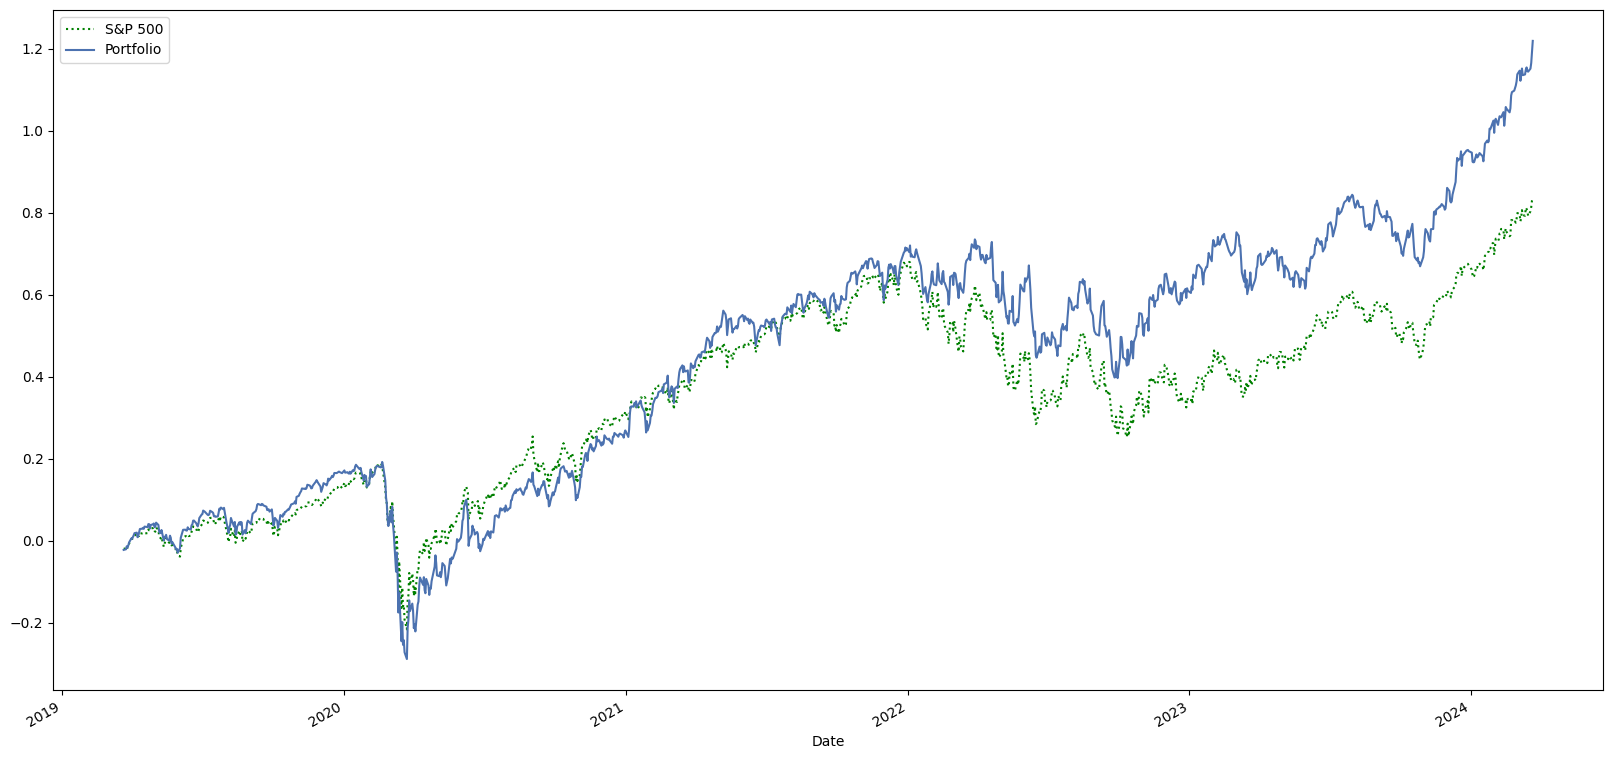

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(sp500_returns, linestyle='dotted', color='green', label='S&P 500')
ax.legend()
# pandas.DataFrame.dot
(portfolio_returns @ portfolio_weights).plot(grid=False, ax=ax, label='Portfolio', legend=True)

## Quick look at the performance of chosen stocks

<Axes: xlabel='Date'>

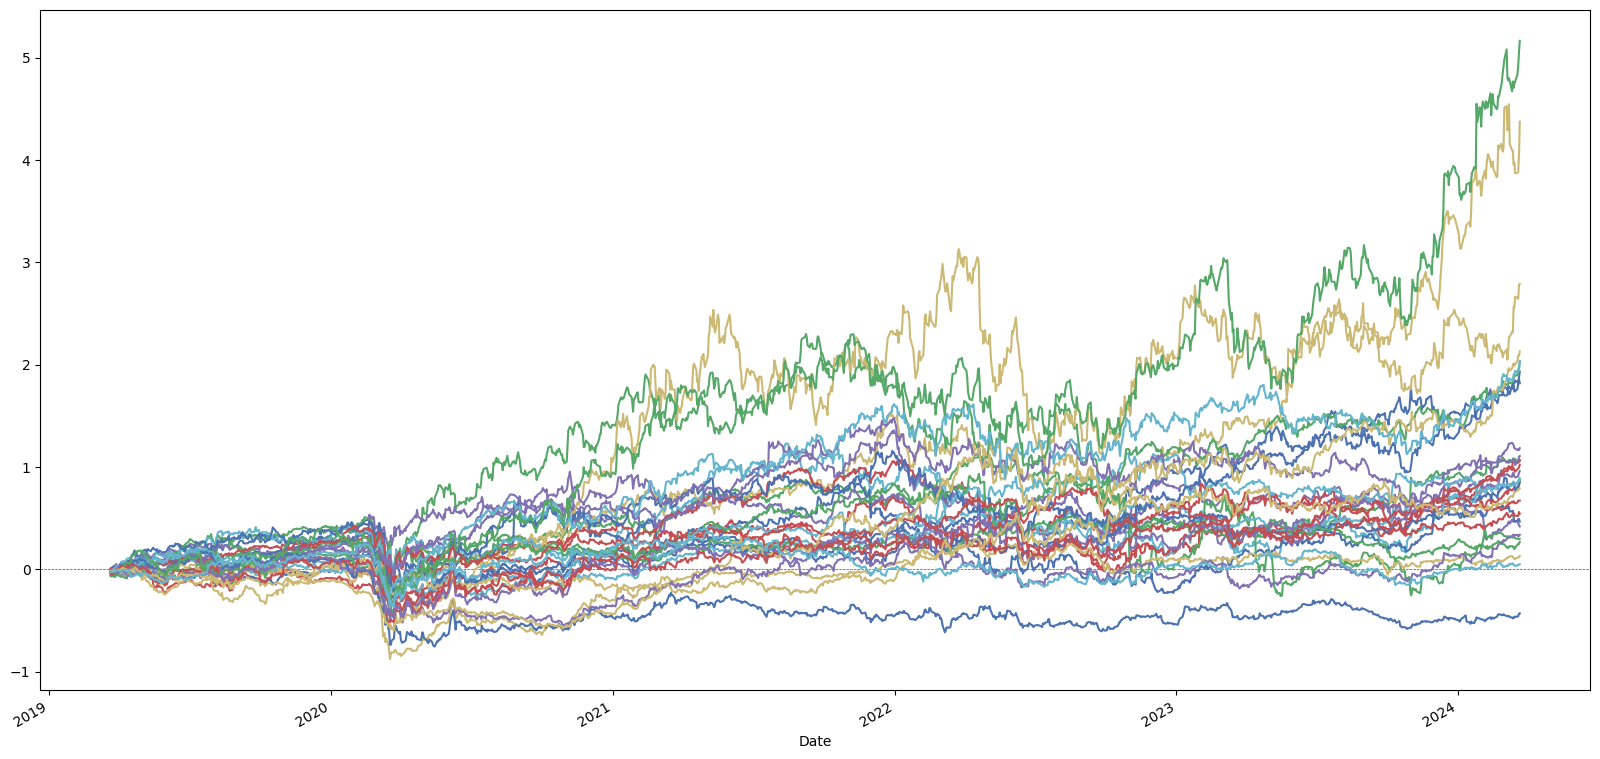

<Figure size 1000x500 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
plt.figure(figsize=(10, 5))
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
portfolio_returns.plot(figsize=(20,10), grid=False, legend=False, ax=ax)

<Axes: >

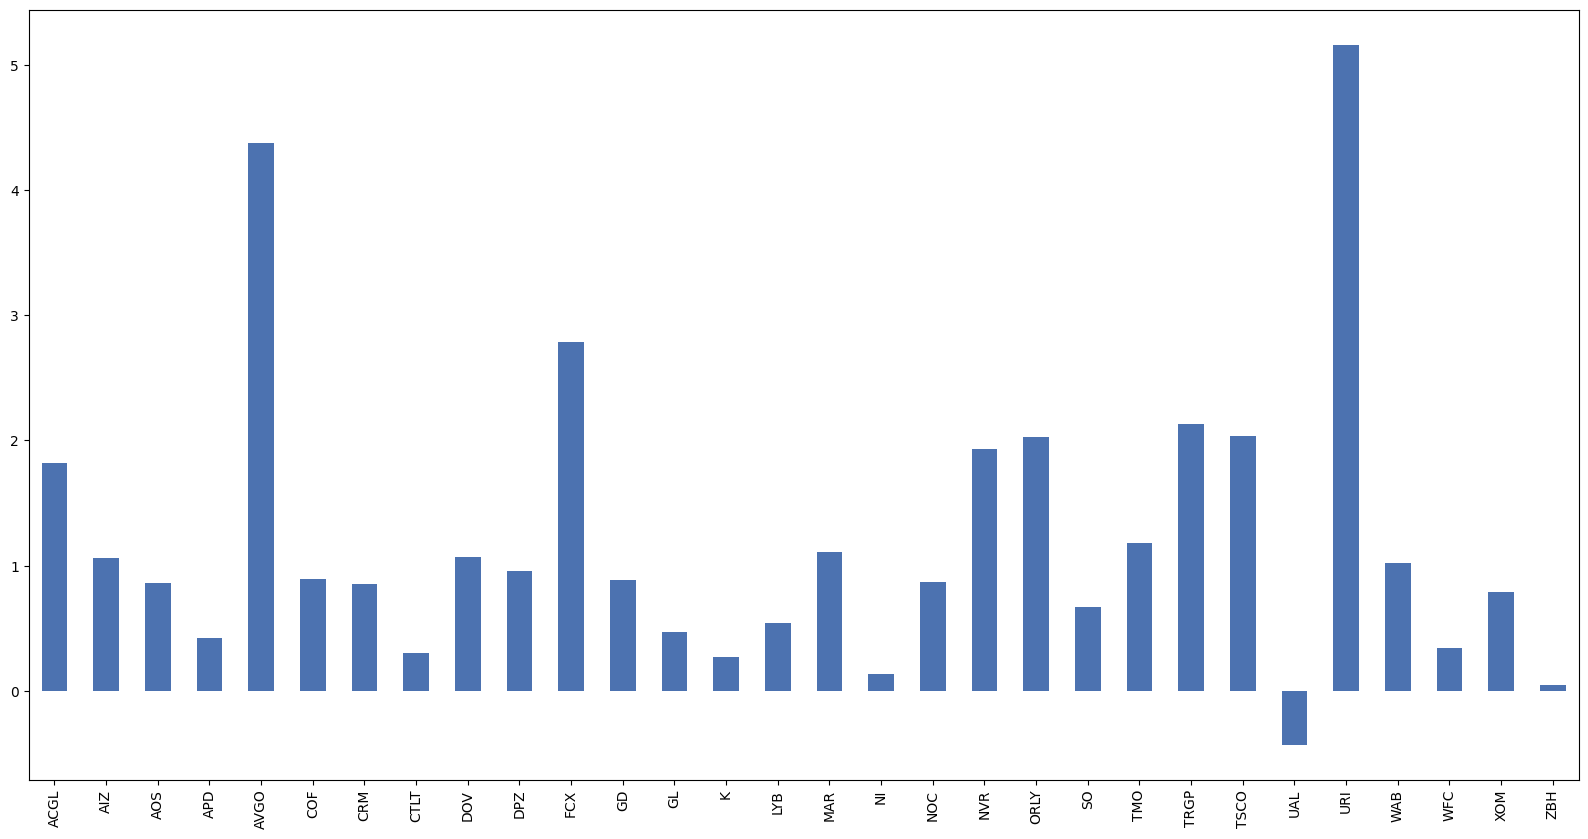

In [14]:
portfolio_returns.iloc[-1].plot(figsize=(20,10), kind='bar')

# 4. Efficient Frontier

In [15]:
money_to_invest = 10000
risk_free_rate = 0.04

In [16]:
mu = mean_historical_return(df, log_returns=True)
S = sample_cov(df)

Expected annual return: 30.5%
Annual volatility: 36.8%
Sharpe Ratio: 0.72

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
AVGO 7
NI 1




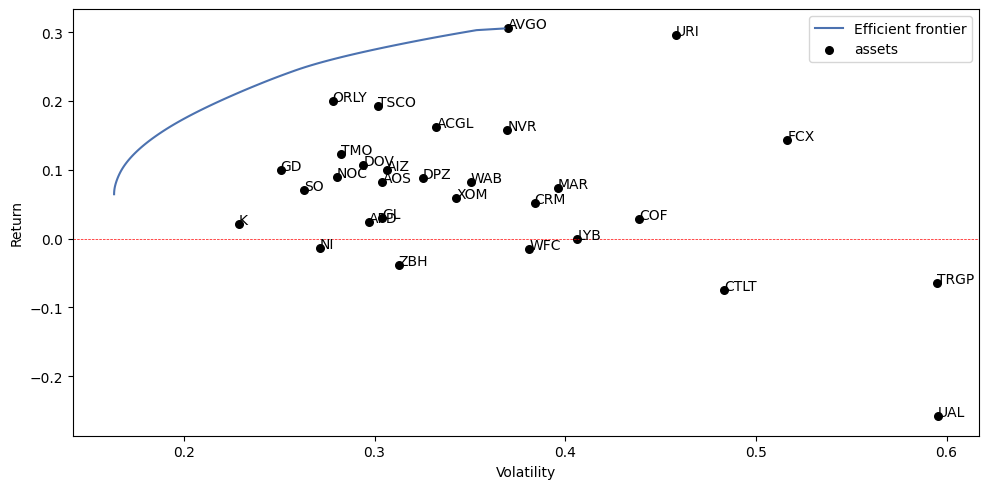

In [17]:
ef = EfficientFrontier(mu, S)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
plotting.plot_efficient_frontier(ef, show_tickers=True)
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
weights = ef.clean_weights(cutoff=0.005, rounding=2)
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

## Optimizations

### Max Sharpe

Expected annual return: 25.0%
Annual volatility: 26.4%
Sharpe Ratio: 0.87

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
AVGO 3
GL 1
ORLY 3
TSCO 6
URI 1




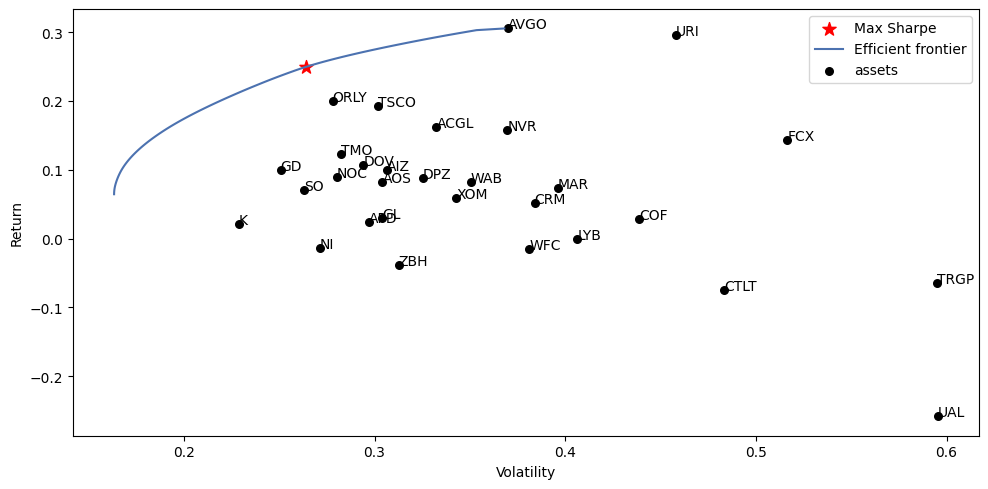

In [18]:
ef = EfficientFrontier(mu, S)
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_max_sharpe.clean_weights(cutoff=0.005, rounding=2)
ef_max_sharpe.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

### Min Volatility

Expected annual return: 6.4%
Annual volatility: 16.3%
Sharpe Ratio: 0.15

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
AIZ 2
AOS 5
DPZ 3
K 64
MAR 2
NOC 2
TMO 2
TSCO 2
XOM 4
ZBH 5




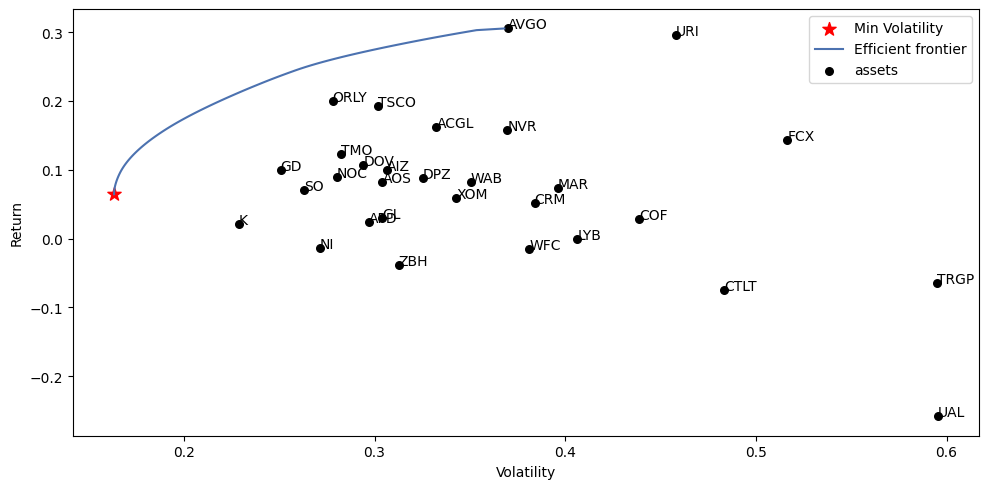

In [19]:
ef = EfficientFrontier(mu, S)
ef_min_volatility = ef.deepcopy()
ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_min_volatility.clean_weights(cutoff=0.005, rounding=2)
ef_min_volatility.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

# 5. Black-Litterman

Black-Litterman allocation lets investors tweak a traditional investment plan (Modern Portfolio Theory) by adding their own beliefs about future market performance.

Imagine an investor thinks a certain sector will outperform expectations. Black-Litterman lets them factor that view in, alongside historical data, to create a more personalized portfolio strategy.

## Approach 1. Analysts' mean target price from FinViz

Also, you can use any API from readme or whatever.

In [20]:
analysts_views = {}
with tqdm(total=len(df.columns)) as pbar: # progress bar
    for stock in df.columns:
        fv_stock = finvizfinance(stock)
        analysts_views[stock] = float(fv_stock.ticker_fundament()['Target Price'])
        time.sleep(1)
        pbar.update(1)

  0%|          | 0/30 [00:00<?, ?it/s]

## Approach 2. Get mean price from last available analysts' reports

Also, you can use your approach to create your own beliefs about future market performance.

In [21]:
def get_last_targets(stock, targets_from='2000-01-01'):
    s = finvizfinance(stock)
    target_price_df = s.ticker_outer_ratings()
    target_price_df['Date'] = pd.to_datetime(target_price_df['Date'])
    target_price_df = target_price_df[target_price_df['Date'] >= targets_from]
    clear_target = []

    for i in range(len(target_price_df)):
        if len(target_price_df['Price'].iloc[i]) > 0:
            if '→' in target_price_df['Price'][i]:
                target_price_splitted = target_price_df['Price'].iloc[i].split('→')
                ct = target_price_splitted[1]
                ct = str.strip(ct).replace('$', '')
                clear_target.append(float(ct))
            else:
                ct = target_price_df['Price'][i]
                ct = str.strip(ct).replace('$', '')
                clear_target.append(float(ct))
    
    if len(clear_target) == 0:
        last_targets = float(s.ticker_fundament()['Target Price'])
    else:
        # last_targets = sum(clear_target)/len(clear_target)
        last_targets = np.mean(clear_target)
        
    return last_targets

In [22]:
analysts_views = {}
with tqdm(total=len(df.columns)) as pbar: # progress bar
    for stock in df.columns:
        analysts_views[stock] = get_last_targets(stock, targets_from='2024-01-01')
        time.sleep(1)
        pbar.update(1)

  0%|          | 0/30 [00:00<?, ?it/s]

---

In [21]:
viewdict = {key:1-df[key].rolling('30D').mean().iloc[-1]/analysts_views[key] for (key, value) in analysts_views.items()}

In [22]:
print('Upsides:')
for key, value in viewdict.items():
    print(f'{key} {value:.2%}')

Upsides:
ACGL 9.82%
AIZ 10.89%
AOS -1.00%
APD 8.26%
AVGO 15.16%
COF 6.51%
CRM 10.02%
CTLT 5.47%
DOV 3.00%
DPZ 9.50%
FCX 12.17%
GD 5.77%
GL 10.29%
K 6.85%
LYB 1.27%
MAR -1.15%
NI 11.00%
NOC 5.21%
NVR 1.66%
ORLY 3.14%
SO 7.92%
TMO 3.20%
TRGP 8.64%
TSCO -3.53%
UAL 30.86%
URI -2.14%
WAB 7.16%
WFC 2.59%
XOM 12.61%
ZBH 7.04%


## Short and Long Allocation

Expected annual return: 13.0%
Annual volatility: 27.4%
Sharpe Ratio: 0.33

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
ACGL 3
AIZ 4
APD 2
AVGO 1
CRM 1
DPZ 2
FCX 6
GL 6
K 18
NI 39
SO 5
UAL 22
WAB 1
XOM 9
ZBH 3
AOS -18
COF -2
CTLT -2
DOV -9
LYB -18
MAR -9
TMO -1
TRGP -1
TSCO -10
URI -3
WFC -26




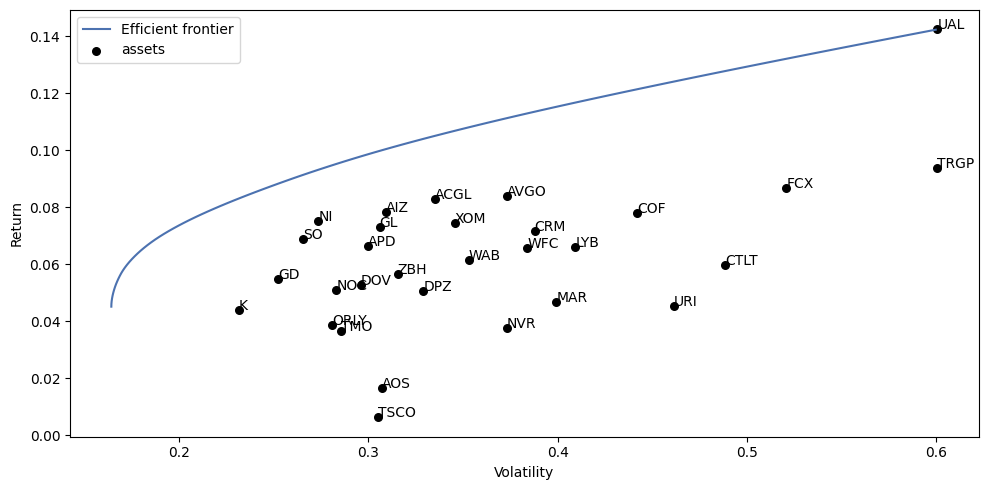

In [23]:
bl = black_litterman.BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()
cov = bl.bl_cov()
ef = EfficientFrontier(rets, cov)
bl.bl_weights()
plt.figure(figsize=(10, 5))
plotting.plot_efficient_frontier(ef, show_tickers=True)
bl.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

latest_prices = get_latest_prices(df)
weights = bl.clean_weights(cutoff=0.005, rounding=2)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

## Long only Allocation

[How to prevent negative weights / shorting with BlackLittermanModel](https://github.com/robertmartin8/PyPortfolioOpt/issues/371)

Expected annual return: 14.2%
Annual volatility: 60.0%
Sharpe Ratio: 0.17

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
UAL 216




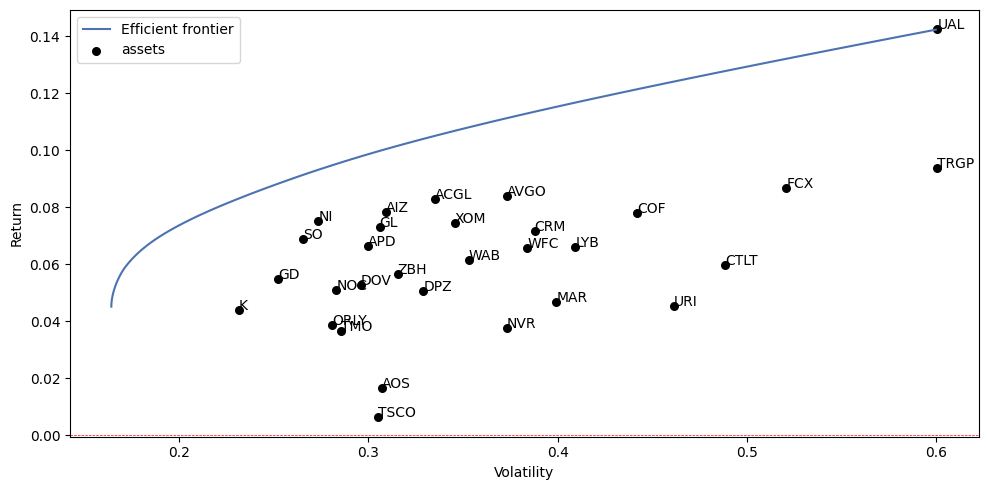

In [24]:
bl = black_litterman.BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()
cov = bl.bl_cov()
ef = EfficientFrontier(rets, cov)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
plotting.plot_efficient_frontier(ef, show_tickers=True)
ax.axhline(0, color='red', linewidth = 0.5, linestyle='--')
weights = ef.clean_weights(cutoff=0.005, rounding=2)
ef.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

### Optimizations

#### Max Sharpe

Expected annual return: 8.2%
Annual volatility: 22.6%
Sharpe Ratio: 0.27

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
ACGL 1
AIZ 5
AVGO 1
CRM 1
DPZ 2
K 19
NI 85
SO 15
UAL 36
XOM 3




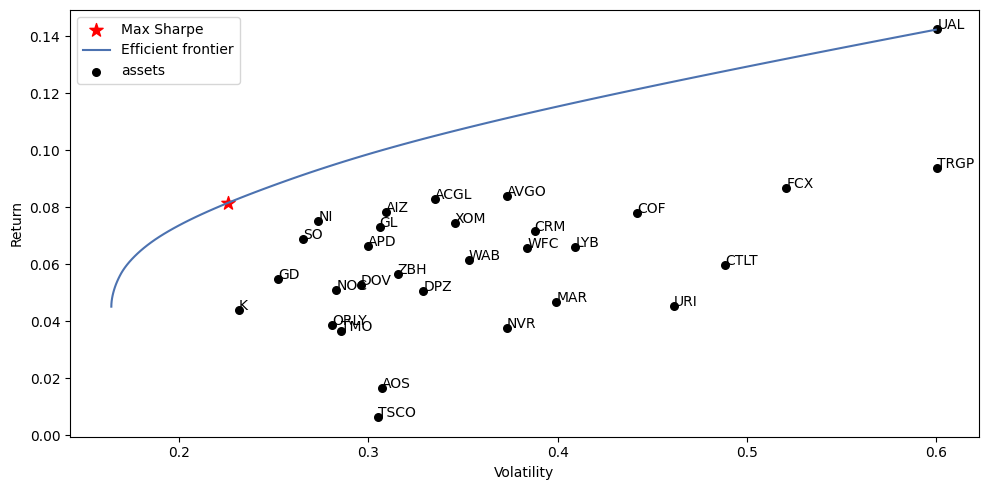

In [25]:
ef = EfficientFrontier(rets, cov)
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_max_sharpe.clean_weights(cutoff=0.005, rounding=2)
ef_max_sharpe.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')

#### Min Volatility

Expected annual return: 4.5%
Annual volatility: 16.4%
Sharpe Ratio: 0.03

S&P 500 annualized return: 12.93%
S&P 500 annualized volatility: 21.24%
Portfolio annualized return: 15.14%
Portfolio annualized volatility: 23.52%

Allocation for 10000 USD
AIZ 2
AOS 4
DPZ 3
K 63
MAR 2
NOC 2
TMO 2
TSCO 2
XOM 4
ZBH 6




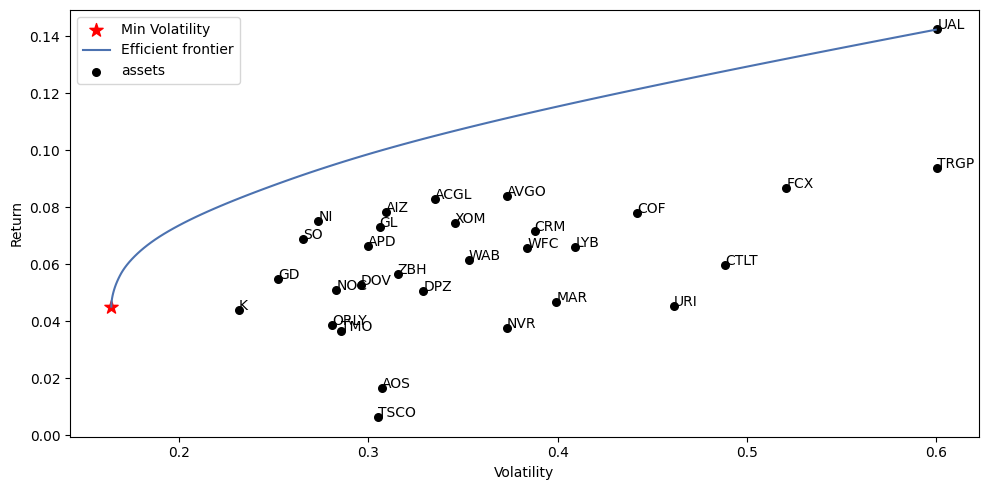

In [26]:
ef = EfficientFrontier(rets, cov)
ef_min_volatility = ef.deepcopy()
ef_min_volatility.min_volatility()
ret_tangent, std_tangent, _ = ef_min_volatility.portfolio_performance()
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers=True)
weights = ef_min_volatility.clean_weights(cutoff=0.005, rounding=2)
ef_min_volatility.portfolio_performance(verbose=True, risk_free_rate=0.04)

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=money_to_invest)
allocation, leftover = da.lp_portfolio()
# allocation, leftover = da.greedy_portfolio()

print(f'\nS&P 500 annualized return: {annualized_sp500_returns:.2%}')
print(f'S&P 500 annualized volatility: {sp500_annualized_volatility:.2%}')
print(f'Portfolio annualized return: {annualized_portfolio_returns:.2%}')
print(f'Portfolio annualized volatility: {portfolio_annualized_volatility:.2%}')
print(f'\nAllocation for {money_to_invest} USD')
for key, value in allocation.items():
    print(f'{key} {value}')
print('\n')